In [2]:
! python -m tensorboard.main --logdir=/path/to/logs

Traceback (most recent call last):
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/tensorflow-1.15.0/python3.6/tensorboard/main.py", line 40, in <module>
    from tensorboard import default
  File "/tensorflow-1.15.0/python3.6/tensorboard/default.py", line 39, in <module>
    from tensorboard.plugins.beholder import beholder_plugin_loader
  File "/tensorflow-1.15.0/python3.6/tensorboard/plugins/beholder/__init__.py", line 18, in <module>
    import tensorflow
  File "/tensorflow-1.15.0/python3.6/tensorflow/__init__.py", line 99, in <module>
    from tensorflow_core import *
  File "/tensorflow-1.15.0/python3.6/tensorflow_core/__init__.py", line 28, in <module>
    from tensorflow.python import pywrap_tensorflow  # pylint: disable=unused-import
  File "<frozen importlib._bootstrap>", line 1007, in _handle_fromlist
  File "/tensorflow-1.15.0/py

In [3]:
# import libraries
import os
import glob
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import imageio as im
import warnings
warnings.filterwarnings('ignore')
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint


from keras import layers        # functional 
from keras.models import Model
from keras.models import load_model
from keras import callbacks
import cv2
import string
import numpy as np
from datetime import datetime
from packaging import version
import tensorflow as tf
from tensorflow import keras
from keras.utils.vis_utils import plot_model  #plotting the model structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
%matplotlib inline 
import matplotlib.pyplot as plt

# load tensorboard for visualizations
%load_ext tensorboard 

Using TensorFlow backend.


In [4]:
!wget "https://github.com/Jimut123/code-backup/blob/master/python/data/c4l-16x16_550.tar.gz?raw=true" -O c4l-16x16_550.tar.gz

--2020-03-23 05:16:23--  https://github.com/Jimut123/code-backup/blob/master/python/data/c4l-16x16_550.tar.gz?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Jimut123/code-backup/raw/master/python/data/c4l-16x16_550.tar.gz [following]
--2020-03-23 05:16:24--  https://github.com/Jimut123/code-backup/raw/master/python/data/c4l-16x16_550.tar.gz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Jimut123/code-backup/master/python/data/c4l-16x16_550.tar.gz [following]
--2020-03-23 05:16:24--  https://raw.githubusercontent.com/Jimut123/code-backup/master/python/data/c4l-16x16_550.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com

In [5]:
!tar -xvf c4l-16x16_550.tar.gz > /dev/null
! echo "Untaring... done..."

Untaring... done...


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau




import keras
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import preprocessing
import cv2
import time



sns.set(style='white', context='notebook', palette='deep')

In [33]:
png_files = glob.glob('c4l-16x16_1104/*.png')
png_files[0]

'c4l-16x16_1104/S_452.png'

In [0]:
index_var = "0123456789"+string.ascii_lowercase+string.ascii_uppercase
index = {}
count = 0
rev_index = {}
for char in index_var:
    # if the character is present then assign a numeric map to it
    if len(glob.glob('c4l-16x16_1104/{}*.png'.format(char)))>0:
      index[char] = count
      rev_index[count] = char
      count += 1
     

In [0]:
index
characters = [ch for ch in index]
number_list_char = [index[ch] for ch in index]

In [0]:
# x_train = []
# y_train = []
# x_test = []
# y_test = []
# for item in png_files:
#     label = str(item.split('.')[0]).split('/')[1][0]
#     image = cv2.imread(item, cv2.IMREAD_UNCHANGED)
#     image = image.flatten()/255.0
#     if index[label] <= 495:
#       x_train.append(image)
#       y_train.append(label)
#       index[label] += 1
#     else:
#       x_test.append(image)
#       y_test.append(label)
#       index[label] += 1

In [0]:
# There are 550 training data for each class, so train : test = 9 : 1
# 495 for train in each label and other for test
# print("Length of training dataset = ",len(x_train)," and label = ",len(y_train))
# print("Length of testing dataset = ",len(x_test)," and label = ",len(y_test))

In [0]:
X = []
Y = []


all_images = []

for item in png_files:
    label = str(item.split('.')[0]).split('/')[1][0]
    image = cv2.imread(item, cv2.IMREAD_UNCHANGED)
    #image = image.flatten()/255.0
    image = image[:, :, np.newaxis]
    all_images.append(image)
    Y.append(index[label])

X = np.array(all_images)

In [0]:

# split into test and train set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=5)

In [14]:
len(y_train)

14105

In [0]:
# convert class vectors to binary class matricies for use in catagorical_crossentropy loss below
# number of action classifications
classifications = 32
y_train = keras.utils.to_categorical(y_train, classifications)
y_test = keras.utils.to_categorical(y_test, classifications)



In [16]:
#reference:-https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py
# CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

hist = model.fit(x_train, y_train,
              batch_size=32,
              epochs=20,
              validation_data=(x_test, y_test),
              shuffle=True)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 14105 samples, validate on 3527 samples
Epoch 1/20





14105/14105 [==============================] - 16s 1ms/step - loss: 2.8738 - acc: 0.2008 - val_loss: 1.1369 - val_acc: 0.7925
Epoch 2/20
14105/14105 [==============================] - 3s 231us/step - loss: 1.0746 - acc: 0.6505 - val_loss: 0.2429 - val_acc: 0.9492
Epoch 3/20
14105/14105 [==============================] - 3s 225us/step - loss: 0.4732 - acc: 0.8458 - val_loss: 0.0745 - val_acc: 0.9847
Epoch 4/20
14105/14105 [==============================] - 3s 219us/step - loss: 0.2597 - acc: 0.9185 - val_loss: 0.0370 - val_acc: 0.9926
Epoch 5/20
14105/14105 [==============================] - 3s 230us/step - loss: 0.1645 - acc: 0.9471 - val_loss: 0.0226 - val_acc: 0.9952
Epoch 6/20
14105/14105 [==============

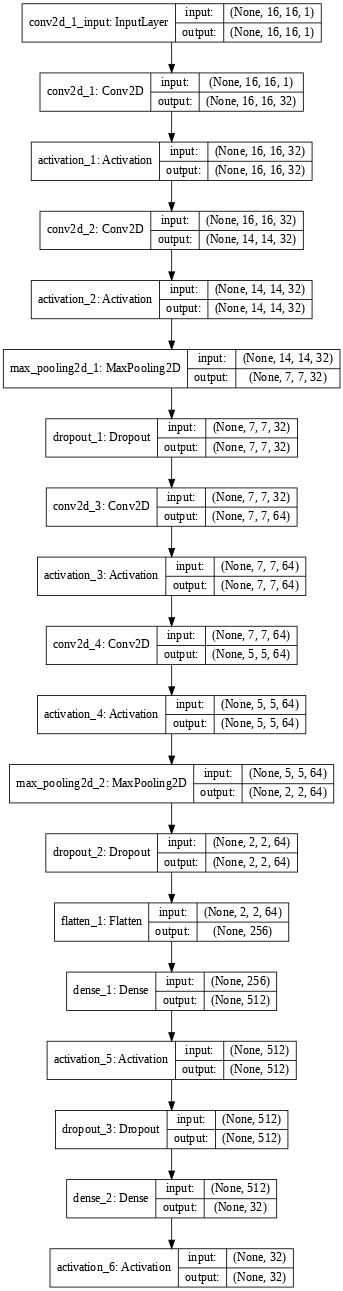

In [17]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True,dpi=60)

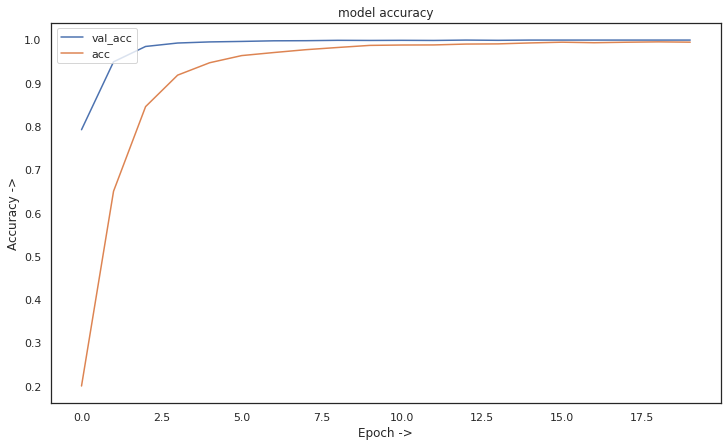

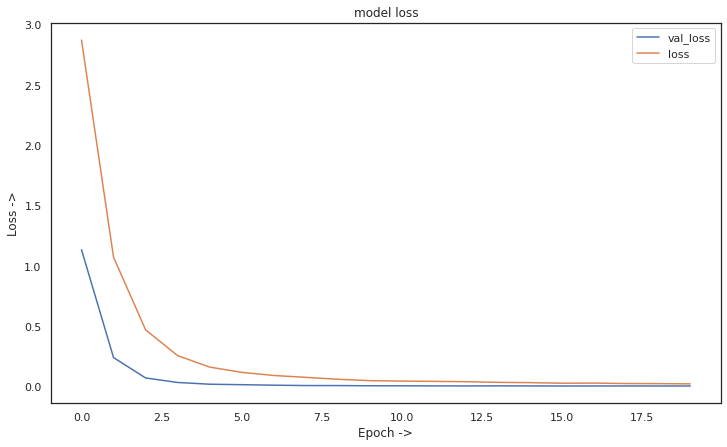

In [18]:

plt.figure(figsize=(12,7))
legend_acc = []
for item in hist.history.keys():
  if item.split('_')[-1:] == ['acc']:
    #print("Accuracy = ",item)
    legend_acc.append(item)
    plt.plot(hist.history[item])
plt.ylabel('Accuracy ->')
plt.xlabel('Epoch ->')
plt.title('model accuracy')
plt.legend(legend_acc, loc='upper left')
plt.show()

plt.figure(figsize=(12,7))
legend_acc = []
for item in hist.history.keys():
  if item.split('_')[-1:] == ['loss']:
    #print("Accuracy = ",item)
    legend_acc.append(item)
    plt.plot(hist.history[item])
plt.ylabel('Loss ->')
plt.xlabel('Epoch ->')
plt.title('model loss')
plt.legend(legend_acc, loc='upper right')
plt.show()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


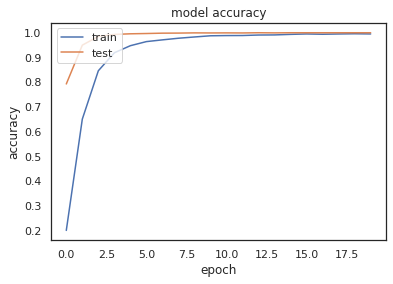

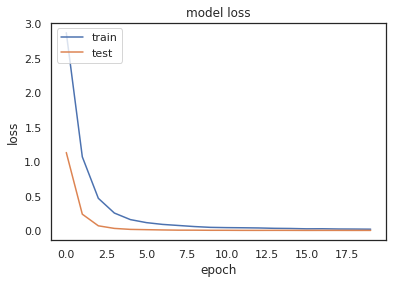

In [19]:
import matplotlib.pyplot as plt
print(hist.history.keys())
# summarize history for accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#resnet , vgg-16

In [0]:
model.save('CNN_c4l-16x16_550.h5')


In [21]:
# download the model from colab
from google.colab import files
files.download('CNN_c4l-16x16_550.h5') 

MessageError: ignored

In [22]:
png_files[0]

'c4l-16x16_1104/S_452.png'

[[6.05113017e-19 7.43948767e-14 2.15155911e-16 9.41849478e-08
  2.85871587e-12 3.86945190e-19 2.45520097e-11 4.89641053e-12
  2.56038658e-16 4.45964202e-13 6.26693456e-18 8.82828348e-20
  6.50770453e-13 4.92173635e-09 1.87836630e-13 2.29255396e-14
  7.11334743e-19 2.29503810e-15 6.66009680e-21 2.97599463e-18
  2.90351021e-10 7.12009066e-16 2.12216078e-20 1.23991935e-14
  9.99999881e-01 2.92534740e-16 7.57430708e-21 5.10886102e-17
  3.93982214e-15 1.37102526e-16 4.72610037e-15 7.40359122e-21]]
Prediction =  S


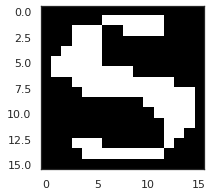

In [23]:

image = cv2.imread(png_files[0], cv2.IMREAD_UNCHANGED)
image_bckup = image.copy()
#image = image.flatten()/255.0
image = image[np.newaxis,:, :, np.newaxis]/255.0
y_prob = model.predict(image)
prediction = y_prob.argmax(axis=-1)
print(y_prob)

#print("Prediction = ",prediction)
print("Prediction = ",rev_index[int(prediction)])
plt.figure(figsize=(3,3))
plt.imshow(image_bckup, cmap=plt.get_cmap('gray'))
plt.show()

In [0]:
hist_list = []
for item in y_prob[0]:
  hist_list.append(item)

In [25]:
print(hist_list)

[6.05113e-19, 7.439488e-14, 2.1515591e-16, 9.418495e-08, 2.8587159e-12, 3.869452e-19, 2.455201e-11, 4.8964105e-12, 2.5603866e-16, 4.459642e-13, 6.2669346e-18, 8.8282835e-20, 6.5077045e-13, 4.9217364e-09, 1.8783663e-13, 2.292554e-14, 7.1133474e-19, 2.295038e-15, 6.660097e-21, 2.9759946e-18, 2.9035102e-10, 7.1200907e-16, 2.1221608e-20, 1.23991935e-14, 0.9999999, 2.9253474e-16, 7.574307e-21, 5.108861e-17, 3.939822e-15, 1.3710253e-16, 4.7261004e-15, 7.403591e-21]


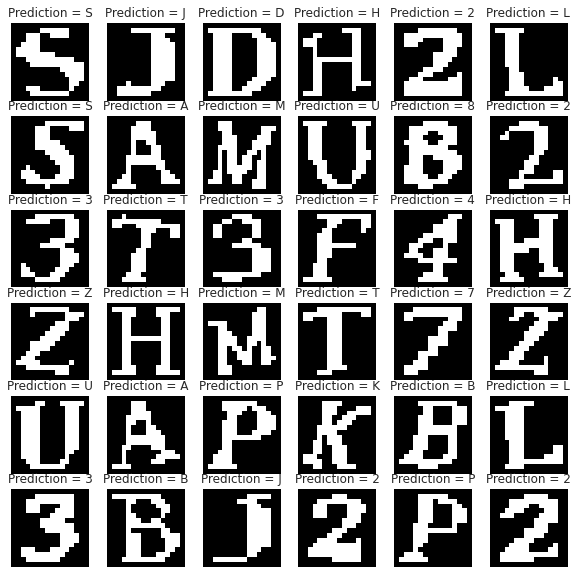

In [26]:
total_img = 36
num_pr = 6 # number per row

counter = 1
plt.figure(figsize=(10,10))
plt.axis('off')
for item in png_files[:total_img]:
  image = cv2.imread(item, cv2.IMREAD_UNCHANGED)
  image_bckup = image.copy()
  image = image[np.newaxis,:, :, np.newaxis]/255.0
  y_prob = model.predict(image)
  prediction = y_prob.argmax(axis=-1)
  plt.subplot(num_pr, num_pr, counter)
  plt.title("Prediction = {}".format(rev_index[int(prediction)]))
  plt.axis('off')
  plt.imshow(image_bckup, cmap=plt.get_cmap('gray'))
  counter += 1
plt.show()

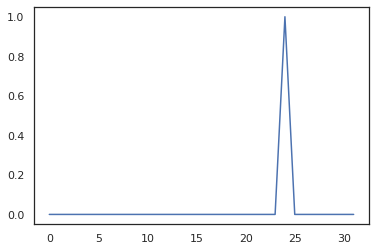

In [27]:
from scipy.stats import norm
from scipy import stats
# Plot between -10 and 10 with .001 steps.

# Mean = 0, SD = 2.
plt.plot(hist_list)
#sns.distplot(np.array(hist_list).reshape(32, 1), fit=stats.laplace, kde=False)
#plt.bar(hist_list, index.values(), width=0.9, color='g')
plt.show()

In [29]:
index.values()

dict_values([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

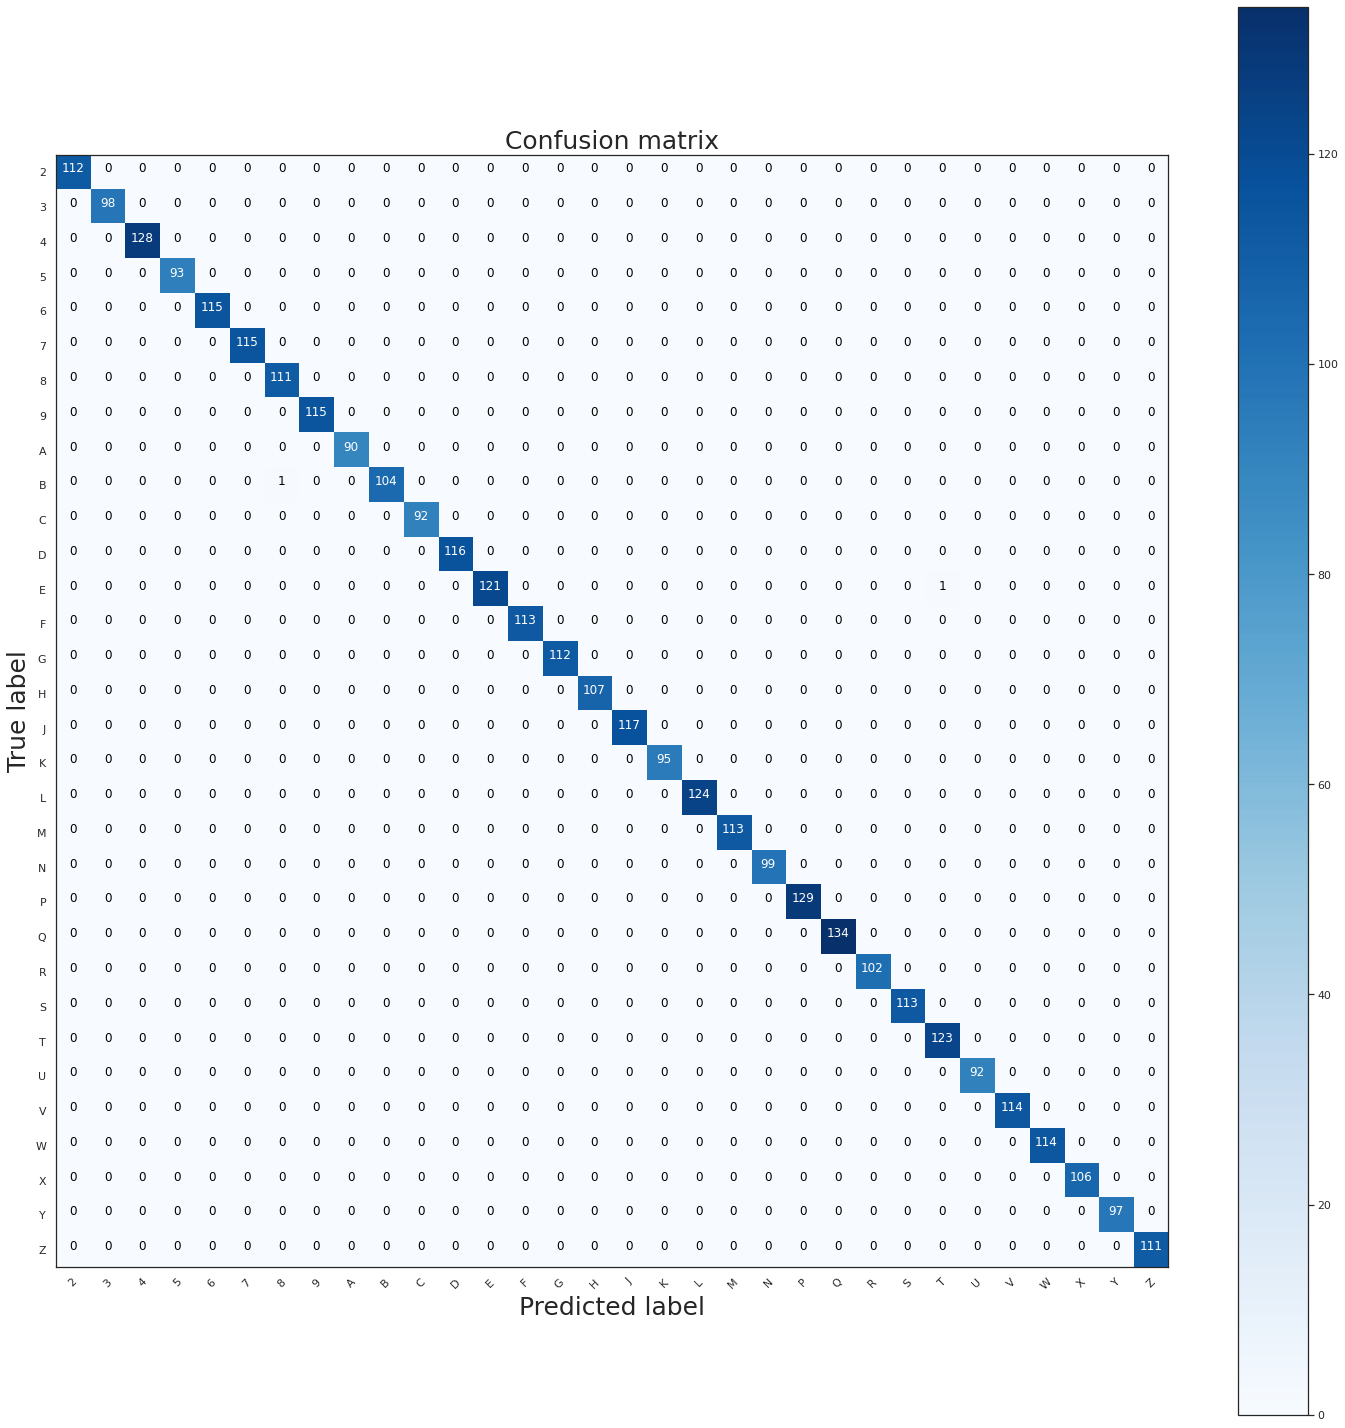

In [32]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(20,20))
    ax= plt.subplot()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=25)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=25)
    plt.xlabel('Predicted label',fontsize=25)
    ax.set_xticklabels([ch for ch in index])
    ax.set_yticklabels([ch for ch in index])

# Predict the values from the validation dataset

y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 

y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1) 
#print("y_true = ",y_true)
#print("y_pred = ",y_pred)
# compute the confusion matrix
#print(y_prob.argmax(axis=-1))
# y_pred_1 = []
# y_true_1 = []
# for item in y_pred:
#   prediction = item.argmax(axis=-1)
#   #print(rev_index[int(prediction)])
#   y_pred_1.append(rev_index[int(prediction)])
#print("y_pred_1 = ",y_pred_1)
# for item in y_true:
#   y_true_1.append(rev_index[item])
#print("y_true_1 = ",y_true_1)
#fig = plt.figure()

confusion_mtx = confusion_matrix(y_true, y_pred_classes) 
#confusion_mtx = confusion_matrix(y_true_1, y_pred_1) 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(32)) 




In [31]:
index

{'2': 0,
 '3': 1,
 '4': 2,
 '5': 3,
 '6': 4,
 '7': 5,
 '8': 6,
 '9': 7,
 'A': 8,
 'B': 9,
 'C': 10,
 'D': 11,
 'E': 12,
 'F': 13,
 'G': 14,
 'H': 15,
 'J': 16,
 'K': 17,
 'L': 18,
 'M': 19,
 'N': 20,
 'P': 21,
 'Q': 22,
 'R': 23,
 'S': 24,
 'T': 25,
 'U': 26,
 'V': 27,
 'W': 28,
 'X': 29,
 'Y': 30,
 'Z': 31}

In [0]:
# https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6
# https://www.kaggle.com/pcarter/mnist-classification-kernel

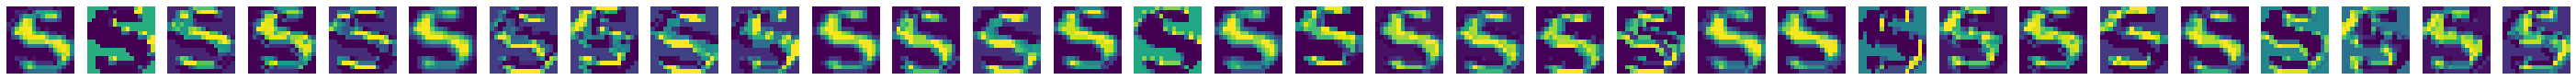

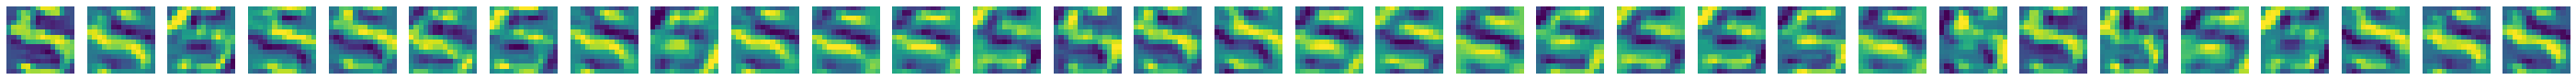

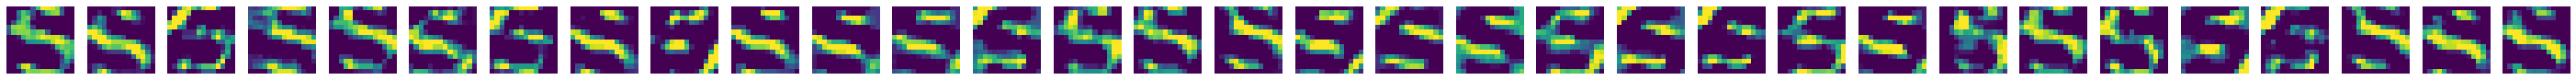

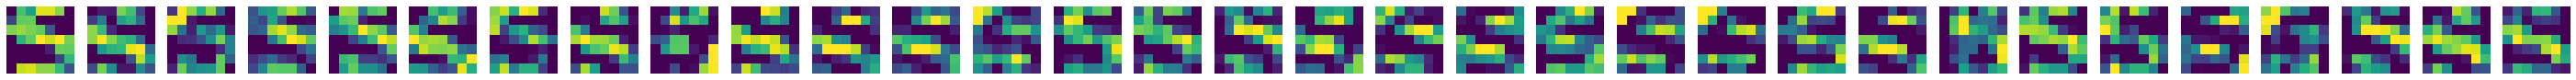

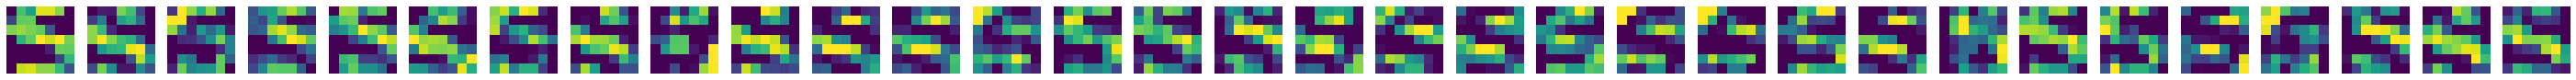

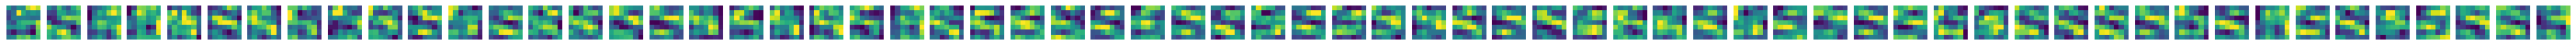

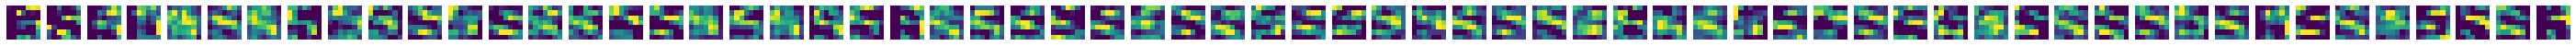

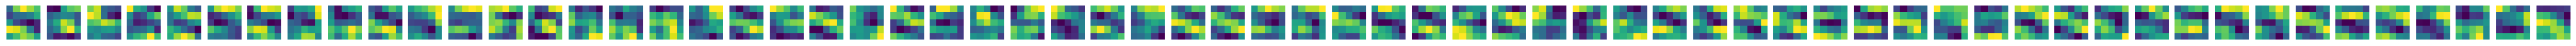

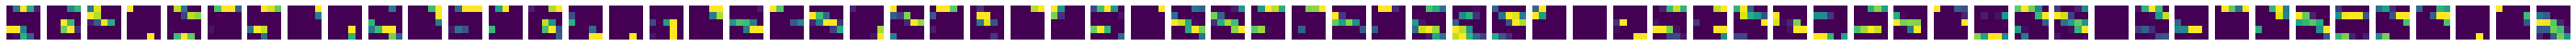

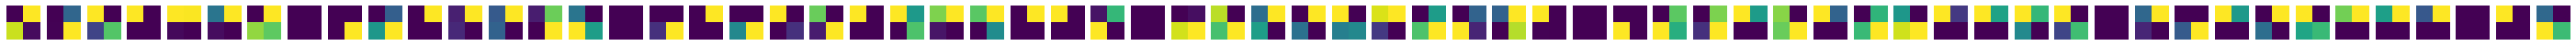

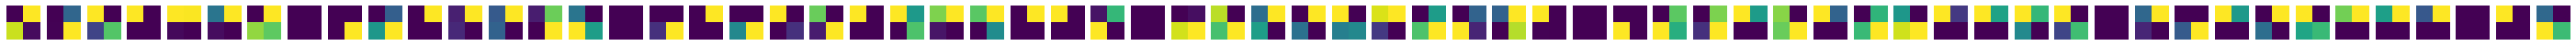

In [38]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
# horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
# human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
# img_path = random.choice(horse_img_files + human_img_files)
img_path = png_files[0]
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
#img_res = cv2.resize(img, (300, 300), interpolation = cv2.INTER_AREA) 
#img = load_img(img_path, target_size=(50, 200))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    size2 = feature_map.shape[2]
    # We will tile our images in this matrix
    plt.figure(figsize=(50, 15))
    #display_grid = np.zeros((size, size * n_features))
    count = 1
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
     
      # We'll tile each filter into this big horizontal grid
      plt.subplot(1, n_features, count)
      plt.imshow(x, cmap='viridis')
      plt.axis("off")
      count += 1
      #display_grid[:, i * size : (i + 1) * size2] = x
    plt.xticks([])
    
    plt.yticks([])
    plt.show()
    # Display the grid
    # scale = 20. / n_features
    # plt.figure(figsize=(scale * n_features, scale))
    # plt.title(layer_name)
    # plt.grid(False)
    # plt.imshow(display_grid, aspect='auto', cmap='viridis')

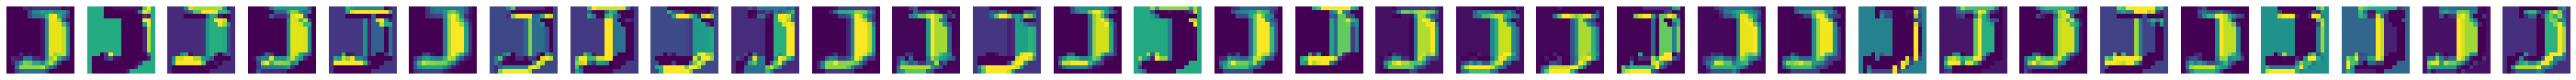

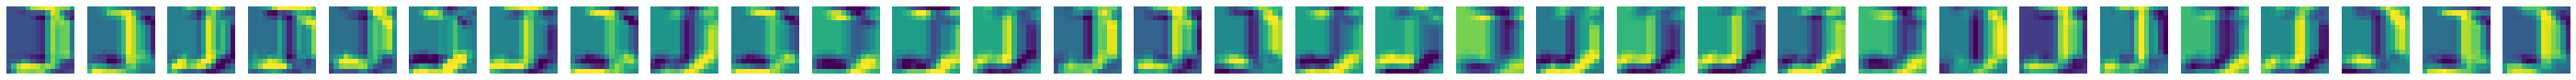

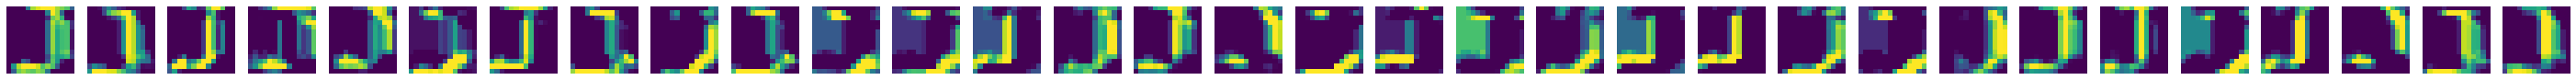

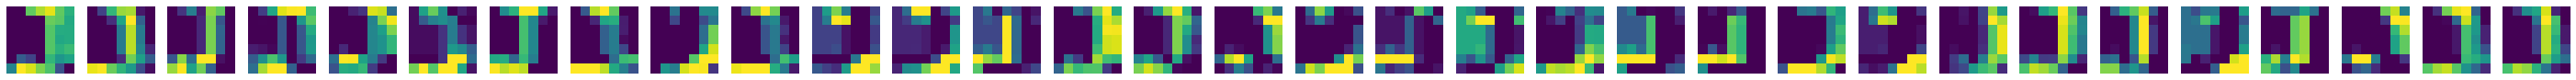

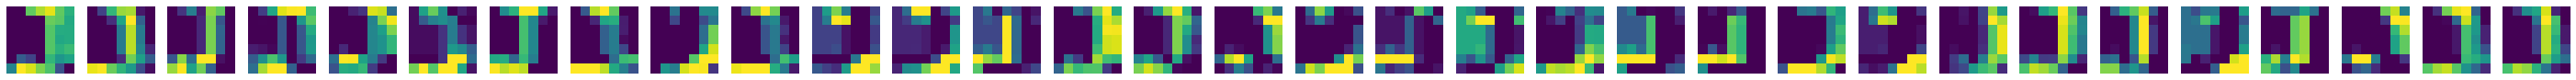

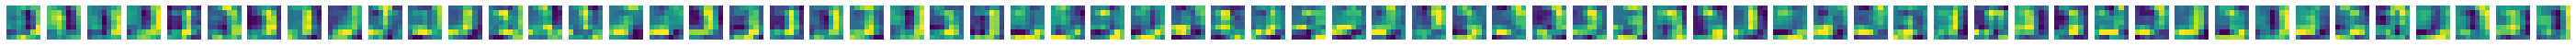

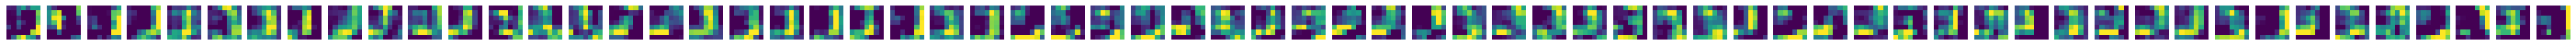

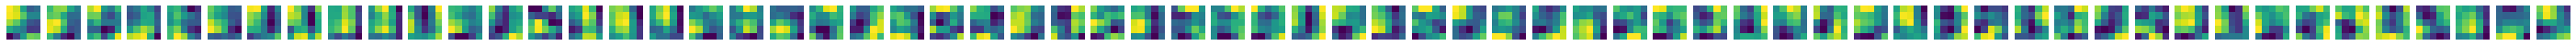

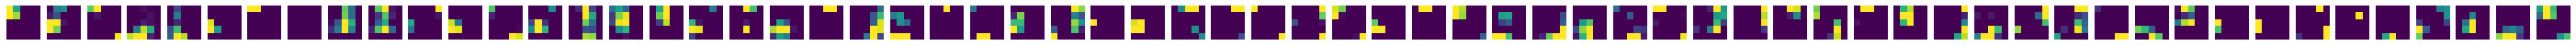

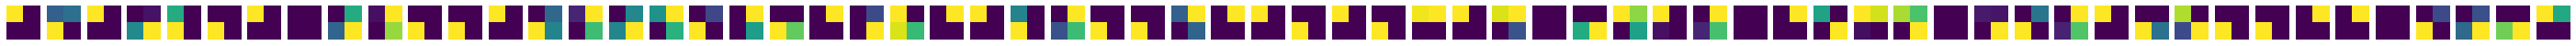

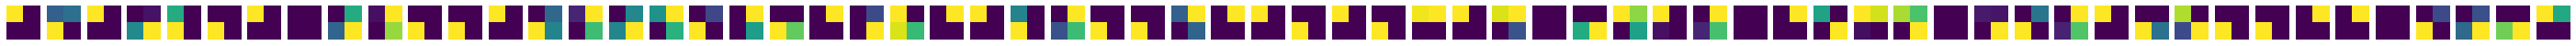

In [39]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
# horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
# human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
# img_path = random.choice(horse_img_files + human_img_files)
img_path = png_files[1]
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
#img_res = cv2.resize(img, (300, 300), interpolation = cv2.INTER_AREA) 
#img = load_img(img_path, target_size=(50, 200))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    size2 = feature_map.shape[2]
    # We will tile our images in this matrix
    plt.figure(figsize=(50, 15))
    #display_grid = np.zeros((size, size * n_features))
    count = 1
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
     
      # We'll tile each filter into this big horizontal grid
      plt.subplot(1, n_features, count)
      plt.imshow(x, cmap='viridis')
      plt.axis("off")
      count += 1
      #display_grid[:, i * size : (i + 1) * size2] = x
    plt.xticks([])
    
    plt.yticks([])
    plt.show()

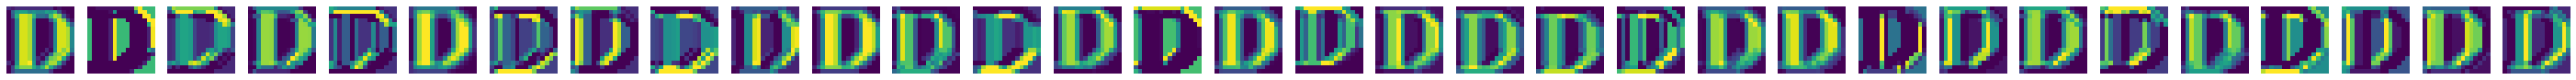

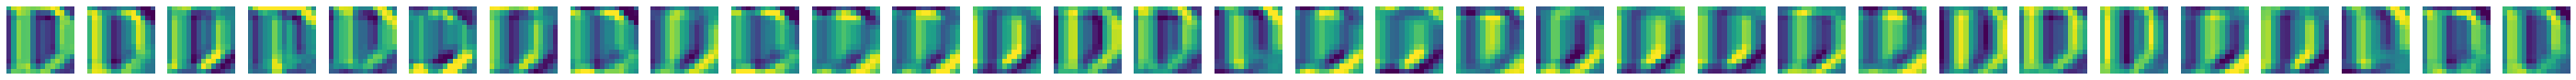

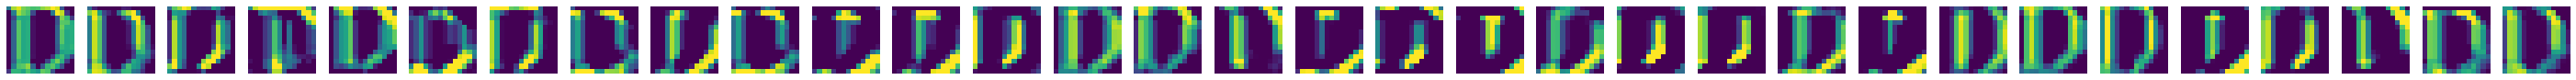

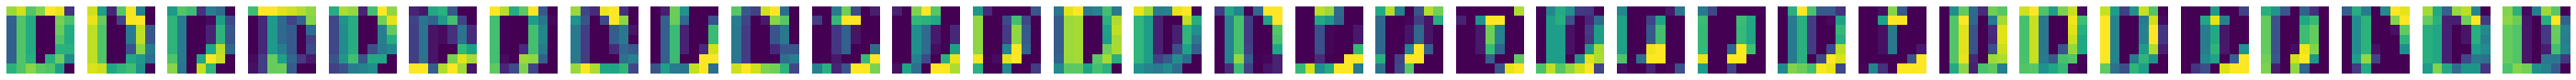

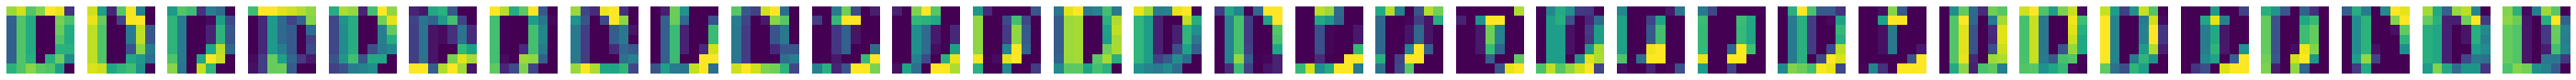

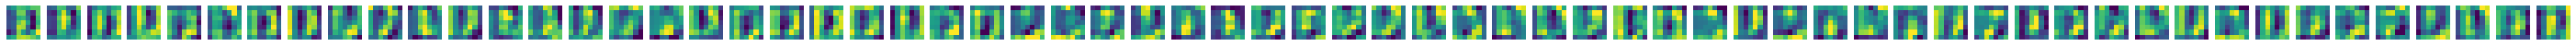

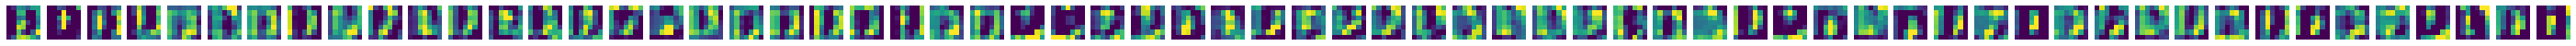

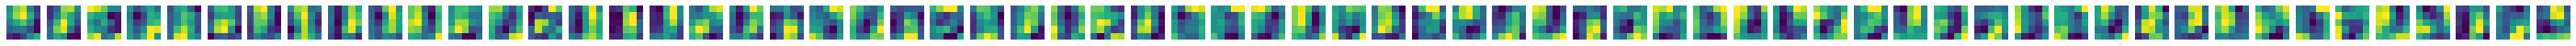

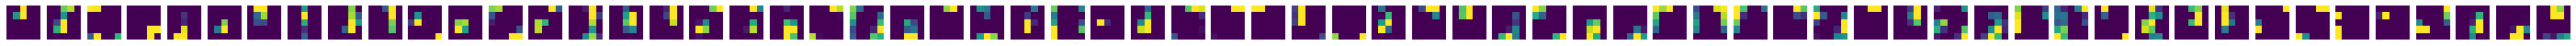

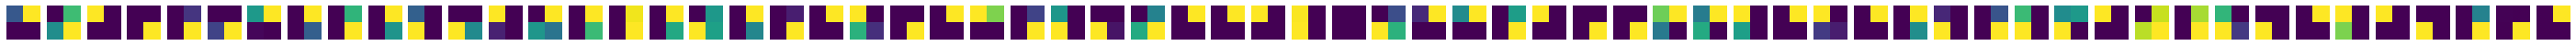

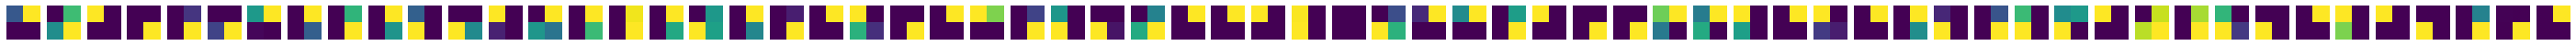

In [40]:
# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
# horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
# human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
# img_path = random.choice(horse_img_files + human_img_files)
img_path = png_files[2]
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
#img_res = cv2.resize(img, (300, 300), interpolation = cv2.INTER_AREA) 
#img = load_img(img_path, target_size=(50, 200))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    size2 = feature_map.shape[2]
    # We will tile our images in this matrix
    plt.figure(figsize=(50, 15))
    #display_grid = np.zeros((size, size * n_features))
    count = 1
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
     
      # We'll tile each filter into this big horizontal grid
      plt.subplot(1, n_features, count)
      plt.imshow(x, cmap='viridis')
      plt.axis("off")
      count += 1
      #display_grid[:, i * size : (i + 1) * size2] = x
    plt.xticks([])
    
    plt.yticks([])
    plt.show()

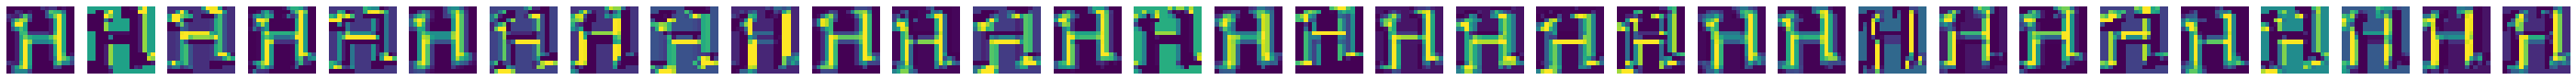

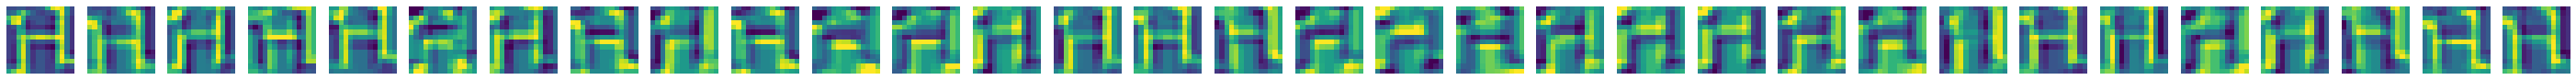

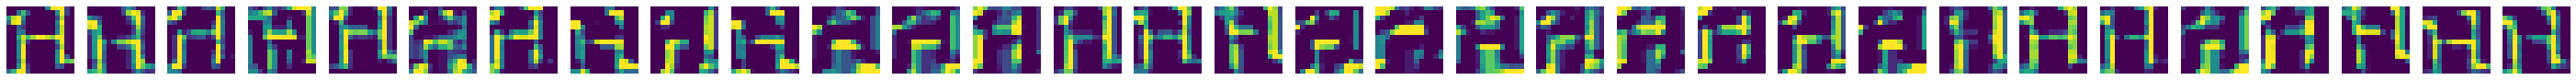

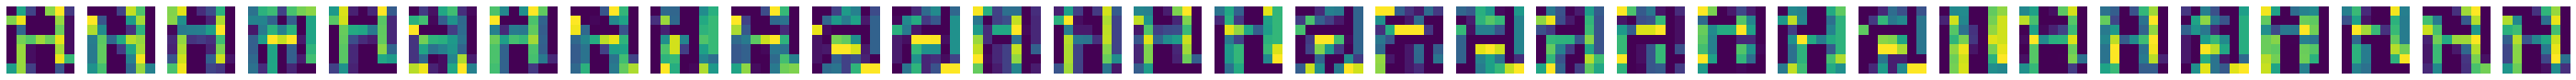

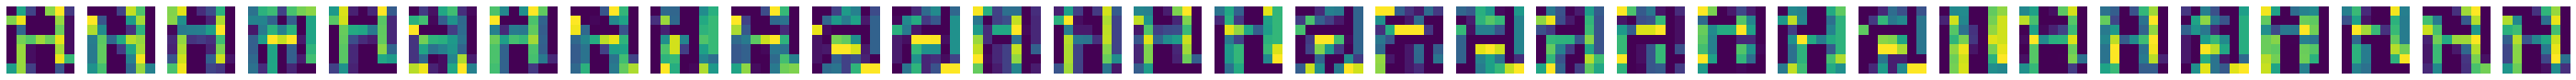

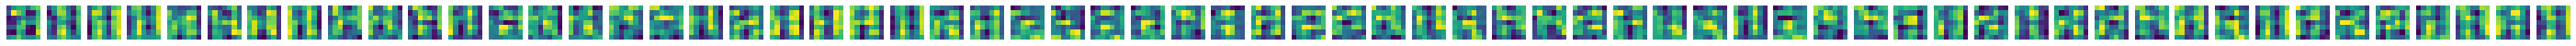

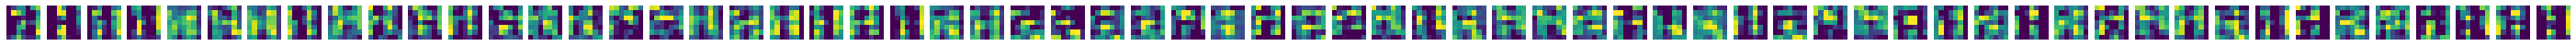

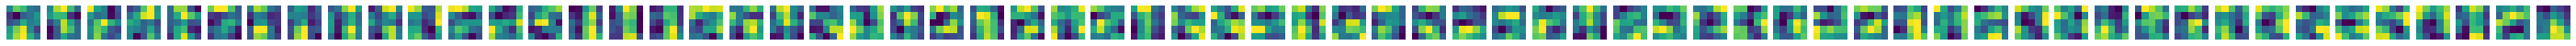

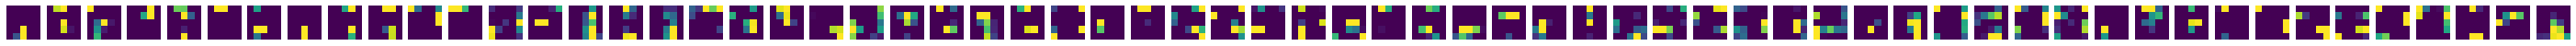

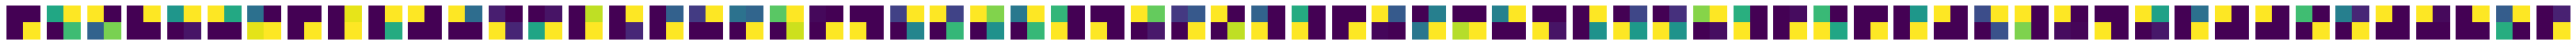

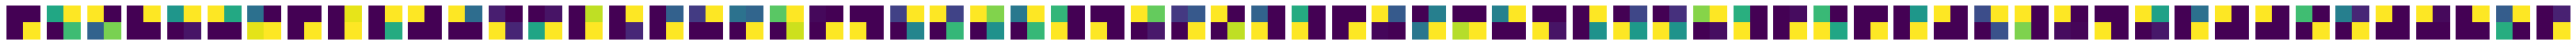

In [41]:
# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
# horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
# human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
# img_path = random.choice(horse_img_files + human_img_files)
img_path = png_files[3]
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
#img_res = cv2.resize(img, (300, 300), interpolation = cv2.INTER_AREA) 
#img = load_img(img_path, target_size=(50, 200))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    size2 = feature_map.shape[2]
    # We will tile our images in this matrix
    plt.figure(figsize=(50, 15))
    #display_grid = np.zeros((size, size * n_features))
    count = 1
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
     
      # We'll tile each filter into this big horizontal grid
      plt.subplot(1, n_features, count)
      plt.imshow(x, cmap='viridis')
      plt.axis("off")
      count += 1
      #display_grid[:, i * size : (i + 1) * size2] = x
    plt.xticks([])
    
    plt.yticks([])
    plt.show()